In [1]:
import pandas as pd
data = pd.read_csv('SolarPrediction.csv')
print(data)

         UNIXTime              Date      Time  Radiation  Temperature  \
0      1475229326    9/29/2016 0:00  23:55:26       1.21           48   
1      1475229023    9/29/2016 0:00  23:50:23       1.21           48   
2      1475228726    9/29/2016 0:00  23:45:26       1.23           48   
3      1475228421    9/29/2016 0:00  23:40:21       1.21           48   
4      1475228124    9/29/2016 0:00  23:35:24       1.17           48   
...           ...               ...       ...        ...          ...   
32681  1480587604  12-01-2016 00:00  00:20:04       1.22           44   
32682  1480587301  12-01-2016 00:00  00:15:01       1.17           44   
32683  1480587001  12-01-2016 00:00  00:10:01       1.20           44   
32684  1480586702  12-01-2016 00:00  00:05:02       1.23           44   
32685  1480586402  12-01-2016 00:00  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
0         30.46        59                  177.39  

In [2]:
from sklearn.cluster import KMeans

data = data.drop('Radiation', axis=1)
data=data.iloc[:10000,4:8]

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)


labels = kmeans.labels_

centers = kmeans.cluster_centers_
centers


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 30.42991926,  79.69246972, 158.15714587,   5.93121819],
       [ 30.4305852 ,  80.40275387,  47.18738095,   5.38795468],
       [ 30.43954712,  79.83843329, 328.12276622,   5.17358629]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

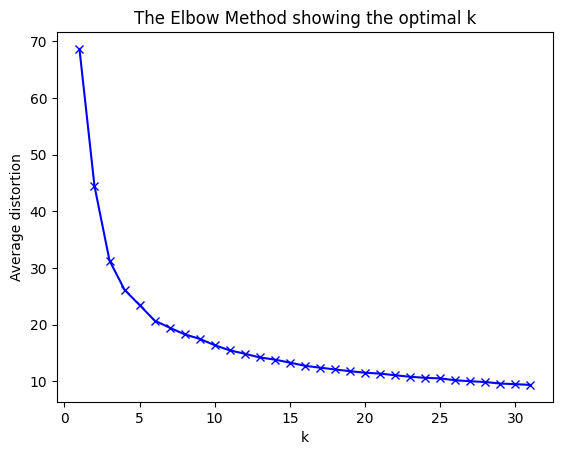

In [3]:
#A2
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []

K = range(1, 32)

for k in K:

    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)

    distortion = sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]


    distortions.append(distortion)


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



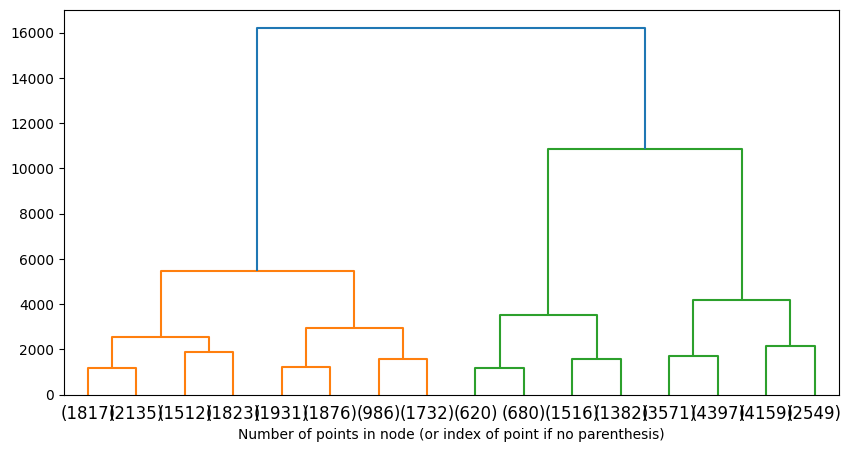

In [10]:
#A3

from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import pandas as pd


data = pd.read_csv('SolarPrediction.csv')
data= data.iloc[:,4:8]

data_array = data.values


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data_array)


counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_,
                                  counts]).astype(float)


plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()


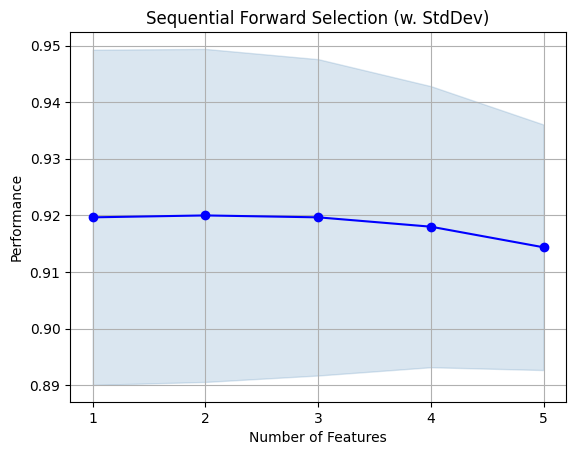

In [12]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


data = pd.read_csv('SolarPrediction.csv')

data['Radiation_Class']=  pd.cut(data['Radiation'],
                                 bins=[0, 800,  1610], labels=[0, 1])
X= data.iloc[:,4:9]
y=data['Radiation_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

estimator = LogisticRegression()


sfs = SFS(estimator,
           k_features=(3,5),
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X, y)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [14]:
#A5

from sklearn.decomposition import PCA


data = pd.read_csv('SolarPrediction.csv')

data= data.iloc[:,4:9]

data_array = data.values

pca = PCA()
pca.fit(data_array)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

k = np.argmax(cumulative_variance > 0.95) + 1

print(f"Number of features needed to capture 95% variance: {k}")


Number of features needed to capture 95% variance: 2


In [16]:
#A6
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


pca = PCA(n_components=k)
transformed_data = pca.fit_transform(data_array)

data = pd.read_csv('SolarPrediction.csv')
data['Radiation_Class']=  pd.cut(data['Radiation'],
                                 bins=[0, 800,  1610], labels=[0, 1])

y=data['Radiation_Class']

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.9044050168247171
